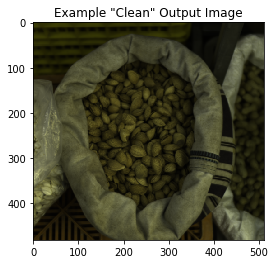

In [26]:
import cv2 as cv
import numpy as np

from scipy.io import loadmat
from matplotlib import pyplot as plt
from os.path import basename,join,splitext
from SpectralUtils import savePNG, projectToRGB

BIT_8 = 256

filePath= "./resources/sample_hs_img_001.mat"
filtersPath = "./resources/cie_1964_w_gain.npz"
savePath = "./output/"

# Load HS image and filters 
cube = loadmat(filePath)['cube']
filters = np.load(filtersPath)['filters']

# Project image to RGB
rgbIm = np.true_divide(projectToRGB(cube, filters), BIT_8)

# Save image file
fileName = splitext(basename(filePath))[0]
path = join(savePath, fileName + '_clean.png')
savePNG(rgbIm, path)

# Display RGB image
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Example "Clean" Output Image')
plt.show()